# plots for paper

In [1]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u

from matplotlib.patches import ConnectionPatch

import os
import get_halpha_SB

%matplotlib inline

%run 'load_data.ipynb'
%run 'add_noise.ipynb'
%run 'extract_FOV.ipynb'
%run 'mask_galaxies.ipynb'

In [84]:
machine='chinook'

### STUFF WE MUST HAVE:
slicewidth = 5.        # initial value
resolution = None      # initial value   # arcsec/pixel
distance   = '100Mpc'  # initial value
data_FOV =None  # from extract_FOV
xystarts =None  # from extract_FOV
size     =None  # from extract_FOV

data_tuple = loaddata(machine=machine, distance=distance, slicewidth=slicewidth)  ### I want this to set the resolution too

### For the full size plots, use low resolution data:
data_tuple_100 = loaddata(machine=machine, distance=distance, slicewidth=slicewidth, resolution=100.)  ### I want this to set the resolution too
#data_tuple = data_tuple_100


Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 100Mpc is 6.40094057981.
Loading data of slicewidth 5 (after rounding), number of slices is 1
./intermediatedata/data_100Mpc_6arcsec_5slwd.npz exists, loading now...
./intermediatedata/data_100Mpc_6arcsec_5slwd.npz was not saved as a tuple since too large, returning as tuple with 32000,1,6.40094057981 appended.
The resolution of the raw simulation at 100Mpc is 6.40094057981.
Loading data of slicewidth 5 (after rounding), number of slices is 1
./intermediatedata/data_100Mpc_100arcsec_5slwd.npz exists, loading now...
./intermediatedata/data_100Mpc_100arcsec_5slwd.npz was saved as a tuple (len(data)==3), so we can return it with the resolution appended.


In [85]:
data = data_tuple[0]
resolution = data_tuple[3]
print data.shape
print resolution

(32000, 32000)
6.40094057981


In [86]:
FOV1_50, xystarts1_50, size1_50    = extractFOV(data_tuple,  resolution, '50Mpc', x_center = 50.5, y_center = 13.5)
FOV1_100, xystarts1_100, size1_100 = extractFOV(data_tuple,  resolution, '100Mpc', x_center = 50.5, y_center = 13.5)
FOV1_200, xystarts1_200, size1_200 = extractFOV(data_tuple,  resolution, '200Mpc', x_center = 50.5, y_center = 13.5)
FOV1_500, xystarts1_500, size1_500 = extractFOV(data_tuple,  resolution, '500Mpc', x_center = 50.5, y_center = 13.5)


In [135]:
def plotcutout(data,minx,miny,size):
    shape = data.shape[0]
    data_cutout = data[int(minx/100.*shape):int((minx+size)/100.*shape),int(miny/100.*shape):int((miny+size)/100.*shape)]
    return data_cutout

def plotbox(minx,miny,sizex,sizey,ax,colour='black',linewidth=1,linestyle='-'):
    ax.plot([minx,minx+sizex,minx+sizex,minx,minx],[miny,miny,miny+sizey,miny+sizey,miny],\
            linestyle=linestyle,color=colour,linewidth=linewidth)


## full simulation with FOV inset figure

The type of size is <type 'int'>
The type of size is <type 'list'>


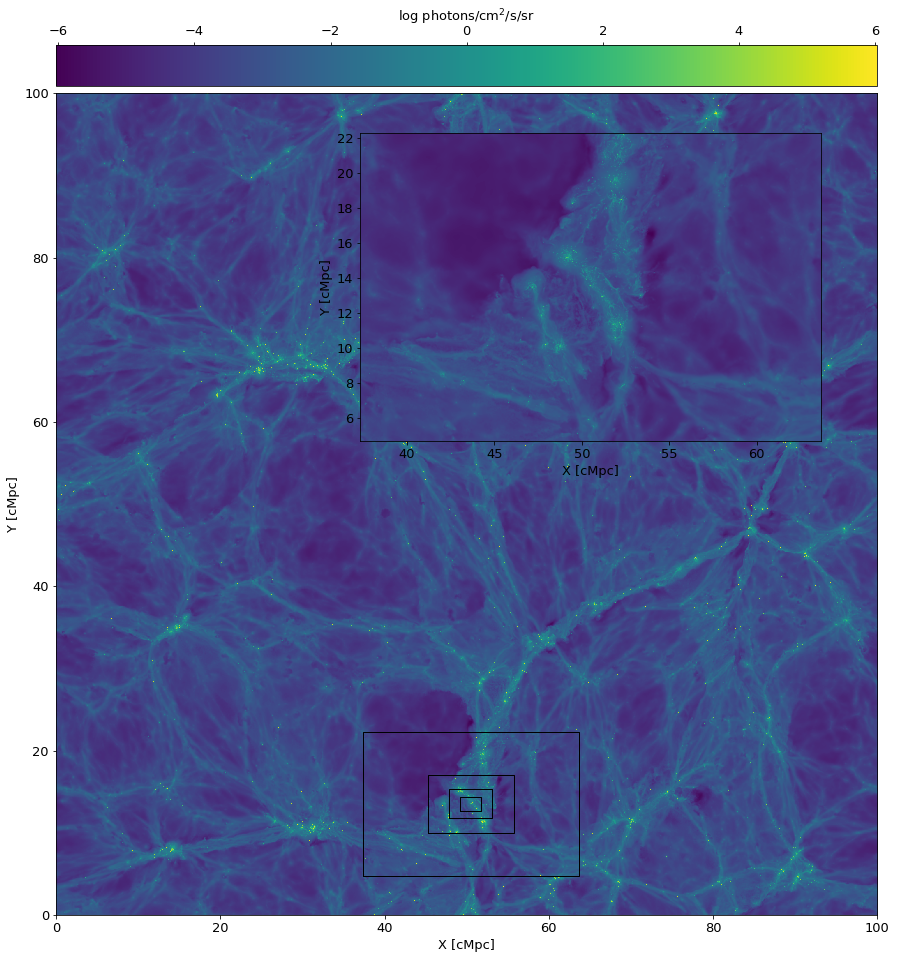

In [7]:
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 16))
get_halpha_SB.makemap(data_tuple_100[0],100,ax1,xystarts = [0,0])
plotbox(xystarts1_50[0],xystarts1_50[1],size1_50[0],size1_50[1],ax1)
plotbox(xystarts1_100[0],xystarts1_100[1],size1_100[0],size1_100[1],ax1)
plotbox(xystarts1_200[0],xystarts1_200[1],size1_200[0],size1_200[1],ax1)
plotbox(xystarts1_500[0],xystarts1_500[1],size1_500[0],size1_500[1],ax1)

ax2 = fig.add_axes([0.42, 0.47, 0.40, 0.40])
get_halpha_SB.makemap(FOV1_500,size1_500,ax2,xystarts=xystarts1_500,colorbar=False)

#plt.tight_layout()

## dragonfly FOVs outlined + filament Figure

The type of size is <type 'list'>


(4.71875, 22.28125)

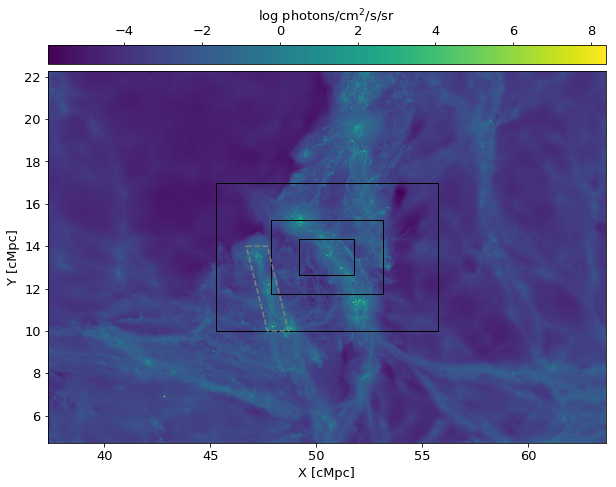

In [8]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
get_halpha_SB.makemap(FOV1_500,size1_500,ax1,xystarts = xystarts1_500)

## plot FOVs
plotbox(xystarts1_50[0],xystarts1_50[1],size1_50[0],size1_50[1],ax1)
plotbox(xystarts1_100[0],xystarts1_100[1],size1_100[0],size1_100[1],ax1)
plotbox(xystarts1_200[0],xystarts1_200[1],size1_200[0],size1_200[1],ax1)

## plot filament box
ax1.plot(np.array([46.2,47.2,48.2,47.2,46.2])+0.5,[14,14,10,10,14],color='grey',label='Region 1',linestyle='--')

ax1.set_xlim(xystarts1_500[0],xystarts1_500[0]+size1_500[0])
ax1.set_ylim(xystarts1_500[1],xystarts1_500[1]+size1_500[1])

## dragonfly full simulation + FOV figure on the side + filament

The type of size is <type 'int'>
(37.328125, 22.28125)
(63.671875, 4.71875)


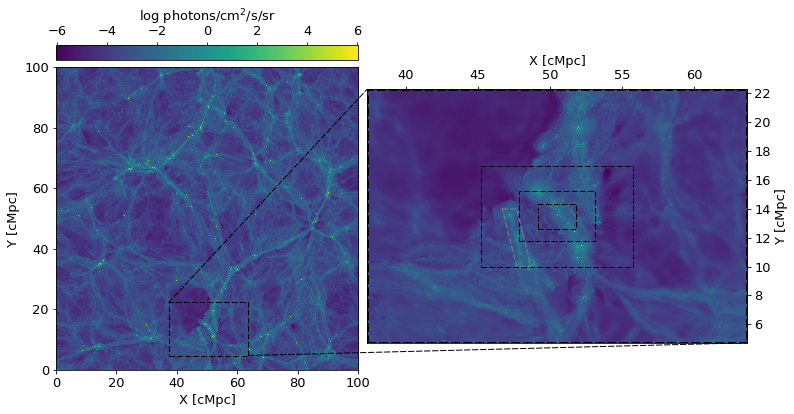

In [168]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_axes([0.1, 0.1, 0.35, 0.4])

get_halpha_SB.makemap(data_tuple_100[0],100,ax1,xystarts = [0,0])
plotbox(xystarts1_500[0],xystarts1_500[1],size1_500[0],size1_500[1],ax1,linestyle='--')

ax2 = fig.add_axes([0.46, 0.07, 0.44, 0.44])
pltimg(FOV1_500,ax2,xystarts1_500,size1_500,colorbar=False,labelaxes=True,ylabelside='right')
## plot FOVs
plotbox(xystarts1_50[0],xystarts1_50[1],size1_50[0],size1_50[1],ax2,linestyle='--')
plotbox(xystarts1_100[0],xystarts1_100[1],size1_100[0],size1_100[1],ax2,linestyle='--')
plotbox(xystarts1_200[0],xystarts1_200[1],size1_200[0],size1_200[1],ax2,linestyle='--')
plotbox(xystarts1_500[0],xystarts1_500[1],size1_500[0],size1_500[1],ax2,linestyle='--',linewidth=3)
## plot filament box
ax2.plot(np.array([46.2,47.2,48.2,47.2,46.2])+0.5,[14,14,10,10,14],color='grey',label='Region 1',linestyle='--',linewidth=1)

xy1 = (xystarts1_500[0],xystarts1_500[1]+size1_500[1])
xy2 = (xystarts1_500[0]+size1_500[0],xystarts1_500[1])
print xy1
print xy2
con1 = ConnectionPatch(xyA=xy1, xyB=xy1, coordsA="data", coordsB="data",
                       axesA=ax1, axesB=ax2, color="black",linestyle='--')
ax1.add_artist(con1)
con2 = ConnectionPatch(xyA=xy2, xyB=xy2, coordsA="data", coordsB="data",
                       axesA=ax1, axesB=ax2, color="black",linestyle='--')
ax1.add_artist(con2)

plt.savefig('extract_FOV_and_cutout_galaxies_fullsimFOVs.png')

## dragonfly 50 Mpc FOV with galaxy cutouts Figure

In [144]:
def plotgalboxes(xgal,ygal,rhgas,rhstar,mgal,ax1,boxsize=0.4,linestyle='-'):
    for i in range(len(xgal)):
        if mgal[i]>10**9:
            minx,miny,sizex,sizey = xgal[i]-boxsize/2.,ygal[i]-boxsize/2.,boxsize,boxsize
            plotbox(minx,miny,sizex,sizey,ax1,colour='grey',linestyle=linestyle)

def pltimg(data_FOV,ax,xystarts,size,label=None,colmap = 'viridis',colorbar=True,labelaxes=True,ylabelside='left'):
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    img = ax.imshow(data_FOV.T,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]),\
                    origin='lower', cmap=cm.get_cmap(colmap),interpolation='nearest')
    if labelaxes:
        fontsize=13
        ax.set_xlabel(r'X [cMpc]',fontsize=fontsize)
        ax.set_ylabel(r'Y [cMpc]',fontsize=fontsize)
        ax.locator_params(axis='y', nticks=3)
        ax.tick_params(labelsize=fontsize) #,top=True,labeltop=True)
        ax.xaxis.set_label_position('top') 
        ax.xaxis.tick_top()
        if ylabelside=='right':
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position('right')
    else:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
    if colorbar:
        div = axgrid.make_axes_locatable(ax)
        cax = div.append_axes("top",size="5%",pad=0.1)
        cbar = plt.colorbar(img, cax=cax,orientation='horizontal')
    if label is not None:
        ax.text(0.0,0.9,label,transform=ax.transAxes,color='white',fontsize=9)

def putinbounds(xy):
    x,y = xy
    if x>xystarts1_50[0]+size1_50[0]:
        print 'setting x (%s) to %s since too large'%(x,xystarts1_50[0]+size1_50[0])
        x = xystarts1_50[0]+size1_50[0]
    if x<xystarts1_50[0]:
        print 'setting x (%s) to %s since too small'%(x,xystarts1_50[0])
        x = xystarts1_50[0]
    if y>xystarts1_50[1]+size1_50[1]:
        print 'setting y (%s) to %s since too large'%(y,xystarts1_50[1]+size1_50[1])
        y = xystarts1_50[1]+size1_50[1]
    if y<xystarts1_50[1]:
        print 'setting y (%s) to %s since too small'%(y,xystarts1_50[1]+size1_50[1])
        y = xystarts1_50[1]
    return (x,y)

In [44]:
### grab out the galaxies inside this FOV
xmin,xmax,ymin,ymax,zmin,zmax = xystarts1_50[0],xystarts1_50[0]+size1_50[0],xystarts1_50[1],xystarts1_50[1]+size1_50[1],10.,15.
xgal_50,ygal_50,zgal_50,mgal_50,rhgas_50,rhstar_50 = searchgals(xmin,xmax,ymin,ymax,zmin,zmax,False,False) # from mask_galaxies

## grab the more massive galaxies
condition_9andup = np.array( (mgal_50 > 10**9) )
ii_9andup = np.array(np.where(condition_9andup)[0]) 
xgal_9andup     = np.array(xgal_50[ii_9andup])
ygal_9andup     = np.array(ygal_50[ii_9andup])
mgal_9andup     = np.array(mgal_50[ii_9andup])
rhstar_9andup   = np.array(rhstar_50[ii_9andup])
rhgas_9andup    = np.array(rhgas_50[ii_9andup])
# sort by position
sortedindices = np.argsort(xgal_9andup) # np.flipud(...)
xgal_9andup     = xgal_9andup[sortedindices]
ygal_9andup     = ygal_9andup[sortedindices]
mgal_9andup     = mgal_9andup[sortedindices]
rhstar_9andup   = rhstar_9andup[sortedindices]
rhgas_9andup    = rhgas_9andup[sortedindices]

In [90]:
data = data_tuple[0]; xsize = data.shape[0]; ysize = data.shape[1]

The type of size is <type 'list'>


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


setting y (14.4326339722) to 14.3625 since too large
setting y (14.4266563416) to 14.3625 since too large


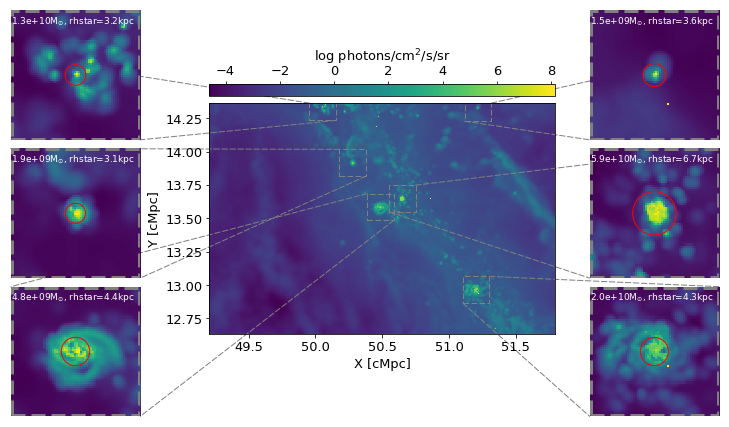

In [136]:
# rect [left, bottom, width, height]
# fig.add_axes(rect)
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_axes([0.37, 0.12, 0.40, 0.5])

#### plot main map
get_halpha_SB.makemap(FOV1_50,size1_50,ax1,xystarts = xystarts1_50)

axessize = 0.15
axesbottom = 0.13
spacing = 0.16
axesleft = 0.14 #0.1
axesright= 0.81 #0.85
ax2 = fig.add_axes([axesleft, axesbottom+2*spacing, axessize, axessize])
ax3 = fig.add_axes([axesleft, axesbottom+spacing, axessize, axessize])
ax4 = fig.add_axes([axesleft, axesbottom, axessize, axessize])

ax7 = fig.add_axes([axesright, axesbottom+2*spacing, axessize, axessize])
ax5 = fig.add_axes([axesright, axesbottom+spacing, axessize, axessize])
ax6 = fig.add_axes([axesright, axesbottom, axessize, axessize])

ax1.set_xlim(xystarts1_50[0],xystarts1_50[0]+size1_50[0])
ax1.set_ylim(xystarts1_50[1],xystarts1_50[1]+size1_50[1])

boxsize = 0.2

#### plot boxes around large galaxies
plotgalboxes(xgal_50,ygal_50,rhgas_50,rhstar_50,mgal_50,ax1,boxsize=boxsize,linestyle='--')

#### plot cutouts of the more massive galaxies inside this FOV
for j,ax in zip(range(6),[ax2,ax3,ax4,ax5,ax6,ax7]):
    minx,miny,maxx,maxy = xgal_9andup[j]-boxsize/2.,ygal_9andup[j]-boxsize/2.,xgal_9andup[j]+boxsize/2.,ygal_9andup[j]+boxsize/2.
    xystarts_tiny=[minx,miny]; size_tiny=[boxsize,boxsize] 
    data_tiny=data[minx*xsize/100.:maxx*xsize/100.,miny*ysize/100.:maxy*ysize/100.]
    
    pltimg(data_tiny,ax,xystarts_tiny,size_tiny,colorbar=False,labelaxes=False,\
           label=r'%.1eM$_{\odot}$, rhstar=%.1fkpc'%((mgal_9andup[j]),rhstar_9andup[j]))

    ax.set_xlim(minx,maxx)
    ax.set_ylim(miny,maxy)
    ax.set_axis_off()
    
    circle1 = plt.Circle((xgal_9andup[j],ygal_9andup[j]), \
                         radius=rhstar_9andup[j]/1000., color='maroon',fill=False)
  #  ax.add_artist(circle1)
    
    circle1 = plt.Circle((xgal_9andup[j],ygal_9andup[j]), \
                         radius=rhstar_9andup[j]/1000.*5., color='red',fill=False)
    ax.add_artist(circle1)
    
    xy1=(maxx,miny)
    xy2=(minx,maxy)
    if (ax==ax5) or (ax==ax6) or (ax==ax7):
        xy1=(minx,miny)
        xy2=(maxx,maxy)
    xy1 = putinbounds(xy1)
    xy2 = putinbounds(xy2)

    con1 = ConnectionPatch(xyA=xy1, xyB=xy1, coordsA="data", coordsB="data",
                           axesA=ax1, axesB=ax, color="grey",linestyle='--')
    con2 = ConnectionPatch(xyA=xy2, xyB=xy2, coordsA="data", coordsB="data",
                           axesA=ax1, axesB=ax, color="grey",linestyle='--')
    ax1.add_artist(con1)
    ax1.add_artist(con2)
    
    plotbox(minx,miny,boxsize,boxsize,ax,colour='grey',linewidth=5,linestyle='--')
    
plt.savefig('extract_FOV_and_cutout_galaxies_FOVwithgalaxies.png')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


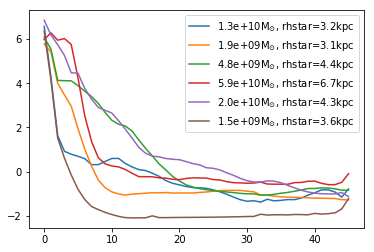

In [171]:
def radial_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile 

for j in range(6):
    minx,miny,maxx,maxy = xgal_9andup[j]-boxsize/2.,ygal_9andup[j]-boxsize/2.,xgal_9andup[j]+boxsize/2.,ygal_9andup[j]+boxsize/2.
    xystarts_tiny=[minx,miny]; size_tiny=[boxsize,boxsize] 
    data_tiny=data[minx*xsize/100.:maxx*xsize/100.,miny*ysize/100.:maxy*ysize/100.]
    
    center, radi = (data_tiny.shape[0]/2,data_tiny.shape[1]/2), 55
    rad = radial_profile(data_tiny, center)

    plt.plot(range(len(rad)),rad,label=r'%.1eM$_{\odot}$, rhstar=%.1fkpc'%((mgal_9andup[j]),rhstar_9andup[j]))
    
# Figure out the scaling along the x-axis
    
# Add profile from van de Voort
# Add observed profile from literature
    
plt.legend()

plt.savefig('extract_FOV_and_cutout_galaxies_halphaprofiles.png')

In [72]:
%run 'mask_galaxies.ipynb'

In [74]:
verbose=True
xmin,xmax,ymin,ymax,zmin,zmax = xystarts1_500[0],xystarts1_500[0]+size1_500[0],xystarts1_500[1],xystarts1_500[1]+size1_500[1],10.,15.
xgal,ygal,zgal,mgal,rhgas,rhstar = searchgals(xmin,xmax,ymin,ymax,zmin,zmax,True,False) # from mask_galaxies

SELECT                 SH.GalaxyID,                 SH.StarFormationRate as SFR,                 SH.CentreOfPotential_x,                 SH.CentreOfPotential_y,                 SH.CentreOfPotential_z,                 SH.SubGroupNumber,                 SH.MassType_Star,                 SH.HalfMassProjRad_Gas,                 SH.HalfMassProjRad_Star             FROM                 RefL0100N1504_SubHalo as SH             WHERE                 SH.SnapNum = 28 and                 SH.CentreOfPotential_x >= 37.328125 and                 SH.CentreOfPotential_x <= 63.671875 and                 SH.CentreOfPotential_y >= 4.71875 and                 SH.CentreOfPotential_y <= 22.28125 and                 SH.CentreOfPotential_z >= 10.0 and                 SH.CentreOfPotential_z <= 15.0 and                 SH.MassType_Star > 0 


37.328125 63.671875 4.71875 22.28125 10.0 15.0


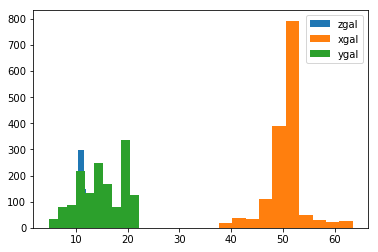

In [75]:
plt.hist(zgal,label='zgal')
plt.hist(xgal,label='xgal')
plt.hist(ygal,label='ygal')
plt.legend()

print xmin,xmax,ymin,ymax,zmin,zmax

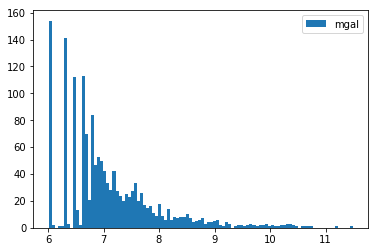

In [81]:
plt.hist(np.log10(mgal),label='mgal',bins=100);
plt.legend()

In [82]:
#Mpcperpix = 0.237/1000.*(1.+0.0115) * resolution
Mpcperpix = 0.477/1000.*(1.+0.0235) * resolution

# Condition (use bitwise "&" and not boolean "and")
condition_8to9 = np.array(   
                              (mgal > 10**8) & (mgal < 10**9)
                         )
condition_9to10 = np.array(  
                               (mgal > 10**9) & (mgal < 10**10)
                          )
condition_10andup = np.array(    
                                 (mgal > 10**10) 
                            )
ii_8to9 = np.array(np.where(condition_8to9)[0]) 
ii_9to10 = np.array(np.where(condition_9to10)[0]) 
ii_10andup = np.array(np.where(condition_10andup)[0]) 

In [83]:
print len(ii_8to9), len(ii_9to10), len(ii_10andup)
xgal_10andup     = np.array(xgal[ii_10andup])
ygal_10andup     = np.array(ygal[ii_10andup])
mgal_10andup     = np.array(mgal[ii_10andup])
rhstar_10andup   = np.array(rhstar[ii_10andup])
sfr_10andup      = np.array(sfr[ii_10andup])
len(ygal_10andup)

134 39 23


23

In [84]:
len(xgal)

1505

The type of size is <type 'list'>


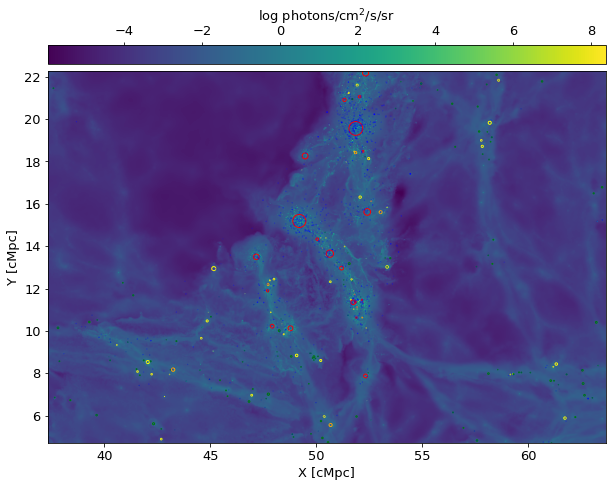

In [85]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
get_halpha_SB.makemap(FOV1_500,size1_500,ax1,xystarts = xystarts1_500)

def plotgals(xgal,ygal,rhgas,rhstar,mgal,ax1,verbose):
    for i in range(len(xgal)):
        colour = 'green'
        if mgal[i]>10**8:
            colour = 'yellow'
        if mgal[i]>10**9:
            colour = 'orange'
        if mgal[i]>10**10:
            colour = 'red'
        circle1 = plt.Circle((xgal[i],ygal[i]), radius=rhgas[i]/1000., color=colour,fill=False)
        ax1.add_artist(circle1)
        circle1 = plt.Circle((xgal[i],ygal[i]), radius=rhstar[i]/1000., color='blue',fill=False)
        ax1.add_artist(circle1)
       # if verbose:
       #     Mpcperpix = 0.237/1000.*(1.+0.0115) * 100.
       #     Mpcperpix = 0.477/1000.*(1.+0.0235) * resolution 
       #     if (rhstar[i]*5.) > (Mpcperpix*1000.) and (rhgas[i]*5.) > (Mpcperpix*1000.):
       #         print("5*rhstar, %.1f, is greater than %s kpc, and has galaxy mass of %s, and a 5*rhgas of %.1f."%\
       #               ((rhstar[i]*5.),(Mpcperpix*1000.),mgal[i],(rhgas[i]*5.)))
       #         circle1 = plt.Circle((xgal[i],ygal[i]), radius=rhstar[i]/1000.*5., color='purple',fill=False)
       #         ax1.add_artist(circle1)

plotgals(xgal,ygal,rhgas,rhstar,mgal,ax1,verbose)

In [86]:
def pltimg(data_FOV,ax,xystarts,size,label=None,colmap = 'viridis'):
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    img = ax.imshow(data_FOV.T,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]),\
                    origin='lower', cmap=cm.get_cmap(colmap),interpolation='nearest')
    div = axgrid.make_axes_locatable(ax)
    cax = div.append_axes("top",size="5%",pad=0.1)
    cbar = plt.colorbar(img, cax=cax,orientation='horizontal')
    if label is not None:
        ax.text(0.0,0.9,label,transform=ax.transAxes,color='white')


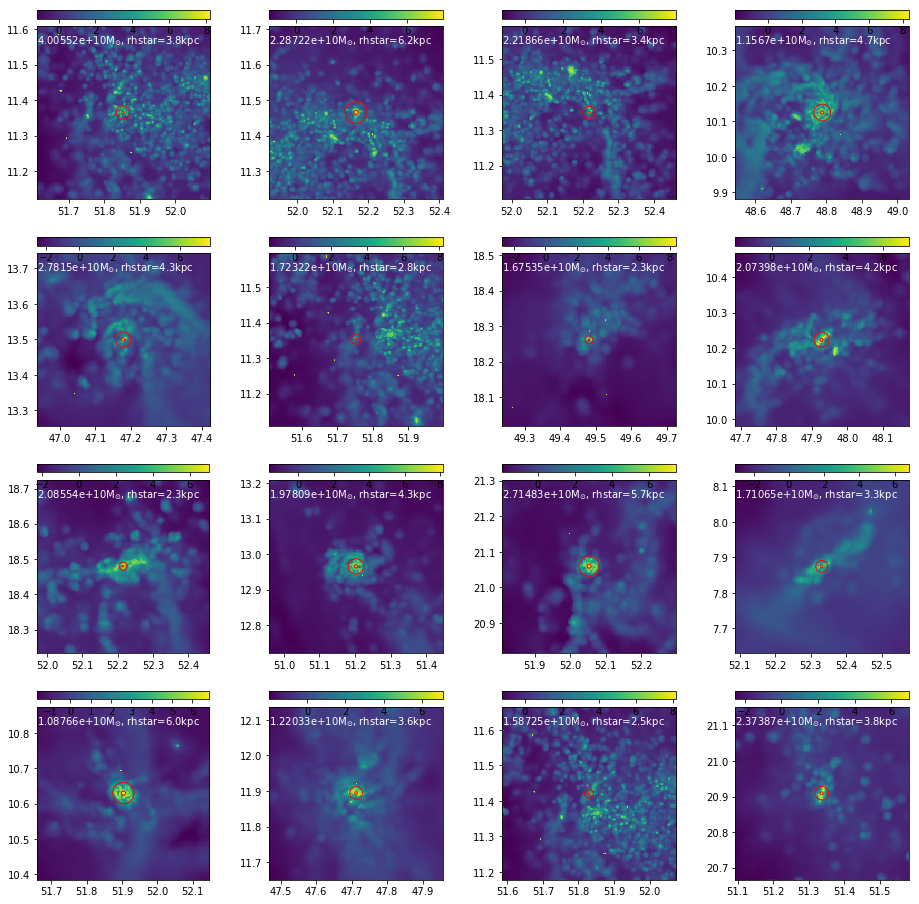

In [87]:
f, axarr = plt.subplots(4, 4,figsize=(16,16))

for j in range(16):
    data_tiny, xystarts_tiny, size_tiny = extractFOV(data_tuple,resolution,distance,\
                                                     x_center=xgal_10andup[j],y_center=ygal_10andup[j],\
                                                     x_angFOV=1000.,y_angFOV=1000.)
    pltimg(data_tiny,axarr[j/4,j%4],xystarts_tiny,size_tiny,\
           label=r'%sM$_{\odot}$, rhstar=%.1fkpc'%(mgal_10andup[j],rhstar_10andup[j]))
    
    circle1 = plt.Circle((xgal_10andup[j],ygal_10andup[j]), radius=rhstar_10andup[j]/1000., color='red',fill=False)
    axarr[j/4,j%4].add_artist(circle1)
    
    circle1 = plt.Circle((xgal_10andup[j],ygal_10andup[j]), radius=rhstar_10andup[j]/1000.*5., color='red',fill=False)
    axarr[j/4,j%4].add_artist(circle1)
